In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 200)


In [53]:
path = "/content/drive/MyDrive/MATKUL_ELEKTRONIK/customer_shopping_data_insight_ready.csv"
df = pd.read_csv(path)

print("Shape:", df.shape)
df.head()


Shape: (99457, 13)


,gender,age,category,quantity,price,payment_method,shopping_mall,invoice_date_time,invoice_date_day,invoice_date_month,invoice_date_year,total_spend,age_class
0,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,2022-08-05,5,8,2022,7502.00,2
1,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,2021-12-12,12,12,2021,5401.53,2
2,Male,20,Clothing,1,300.08,Cash,Metrocity,2021-11-09,9,11,2021,300.08,1
3,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,2021-05-16,16,5,2021,15004.25,6
4,Female,53,Books,4,60.60,Cash,Kanyon,2021-10-24,24,10,2021,242.40,5


In [54]:
df["price"].describe()


,price
count,99457.000000
mean,689.256321
std,941.184567
min,5.230000
25%,45.450000
50%,203.300000
75%,1200.320000
max,5250.000000


In [55]:
n_unique_price = df["price"].nunique()
print("Jumlah variasi price (unique):", n_unique_price)


Jumlah variasi price (unique): 40


In [56]:
price_table = pd.DataFrame({
    "No": range(1, len(unique_prices_sorted) + 1),
    "Price": unique_prices_sorted
})

price_table


,No,Price
0,1,5.23
1,2,10.46
2,3,11.73
3,4,15.15
4,5,15.69
5,6,20.92
6,7,23.46
7,8,26.15
8,9,30.30
9,10,35.19


In [57]:
df_price_desc = df.sort_values("price", ascending=False)

print("Top 10 transaksi TERMAHAL:")
df_price_desc[[
    "category", "price", "quantity", "age", "age_class",
    "gender", "shopping_mall", "payment_method"
]].head(10)


Top 10 transaksi TERMAHAL:


,category,price,quantity,age,age_class,gender,shopping_mall,payment_method
65681,Technology,5250.0,5,50,4,Female,Kanyon,Cash
17073,Technology,5250.0,5,28,2,Male,Istinye Park,Cash
31520,Technology,5250.0,5,26,2,Male,Mall of Istanbul,Credit Card
31509,Technology,5250.0,5,22,2,Female,Kanyon,Credit Card
89707,Technology,5250.0,5,20,1,Male,Istinye Park,Cash
14008,Technology,5250.0,5,26,2,Female,Viaport Outlet,Credit Card
17059,Technology,5250.0,5,27,2,Female,Metrocity,Cash
17016,Technology,5250.0,5,38,3,Female,Metrocity,Cash
65734,Technology,5250.0,5,30,2,Female,Metrocity,Cash
7068,Technology,5250.0,5,37,3,Male,Metrocity,Cash


In [58]:
df_price_asc = df.sort_values("price", ascending=True)

print("Top 10 transaksi TERMURAH:")
df_price_asc[[
    "category", "price", "quantity", "age", "age_class",
    "gender", "shopping_mall", "payment_method"
]].head(10)


Top 10 transaksi TERMURAH:


,category,price,quantity,age,age_class,gender,shopping_mall,payment_method
73175,Food & Beverage,5.23,1,31,3,Male,Kanyon,Cash
43789,Food & Beverage,5.23,1,54,5,Female,Kanyon,Cash
6998,Food & Beverage,5.23,1,48,4,Female,Mall of Istanbul,Cash
43834,Food & Beverage,5.23,1,24,2,Male,Istinye Park,Cash
43836,Food & Beverage,5.23,1,41,4,Female,Kanyon,Credit Card
92658,Food & Beverage,5.23,1,24,2,Male,Metropol AVM,Cash
92660,Food & Beverage,5.23,1,58,5,Female,Metrocity,Cash
73131,Food & Beverage,5.23,1,56,5,Male,Metrocity,Cash
81556,Food & Beverage,5.23,1,59,5,Female,Mall of Istanbul,Credit Card
34163,Food & Beverage,5.23,1,58,5,Female,Istinye Park,Debit Card


MEMBUAT KELAS UNTUK PRICE

In [59]:
def map_price_class(p):
    if p <= 20:
        return 0
    elif p <= 50:
        return 1
    elif p <= 100:
        return 2
    elif p <= 500:
        return 3
    elif p <= 1000:
        return 4
    elif p <= 2000:
        return 5
    else:
        return 6


In [61]:
df["price_class"] = df["price"].apply(map_price_class).astype(int)

df[["price", "price_class"]].head(10)


,price,price_class
0,1500.40,5
1,1800.51,5
2,300.08,3
3,3000.85,6
4,60.60,2
5,1500.40,5
6,40.66,1
7,600.16,4
8,900.24,4
9,600.16,4


In [62]:
df.groupby("price_class")["price"].unique()


,price
price_class,
0,"[10.46, 15.15, 15.69, 5.23, 11.73]"
1,"[40.66, 30.3, 45.45, 26.15, 35.19, 20.92, 23.4..."
2,"[60.6, 75.75, 71.68, 81.32, 58.65]"
3,"[300.08, 143.36, 203.3, 121.98, 107.52, 162.64..."
4,"[600.16, 900.24, 600.17]"
5,"[1500.4, 1800.51, 1200.32, 1050.0, 1200.34]"
6,"[3000.85, 5250.0, 2400.68, 4200.0, 2100.0, 315..."


INSIGHT UNTUK KATEGORI PRICE

In [71]:
price_plot_df = price_insight.copy()

print("Jumlah bar (price unik):", len(price_plot_df))
price_plot_df.head()


Jumlah bar (price unik): 40


,price,transaksi_count,total_spend_sum
0,5.23,3002,15700.46
1,10.46,2909,60856.28
2,11.73,1024,12011.52
3,15.15,985,14922.75
4,15.69,2992,140833.44


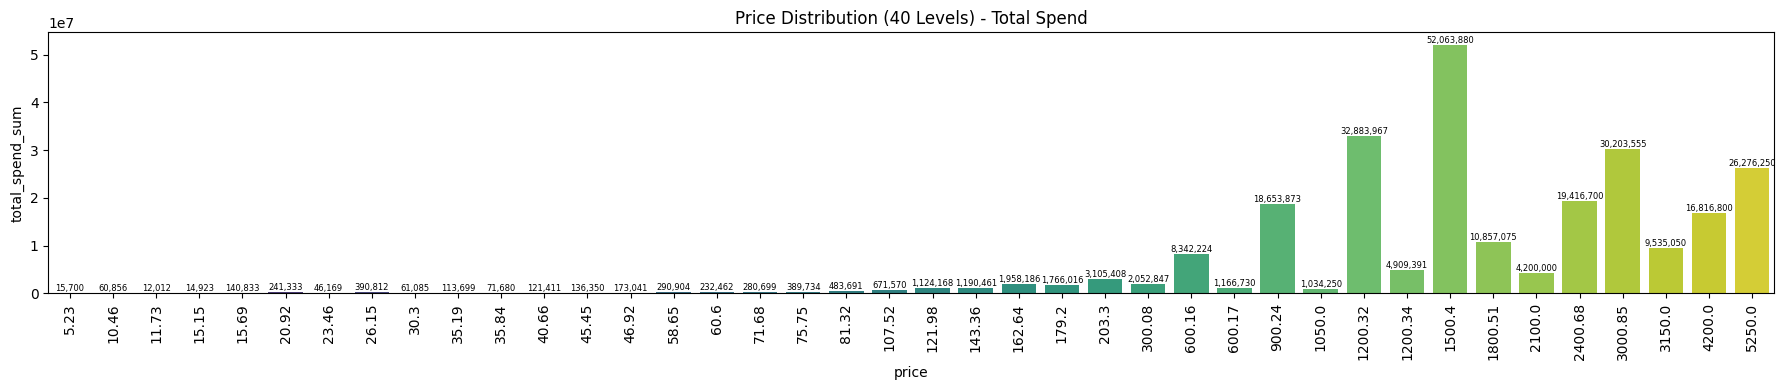

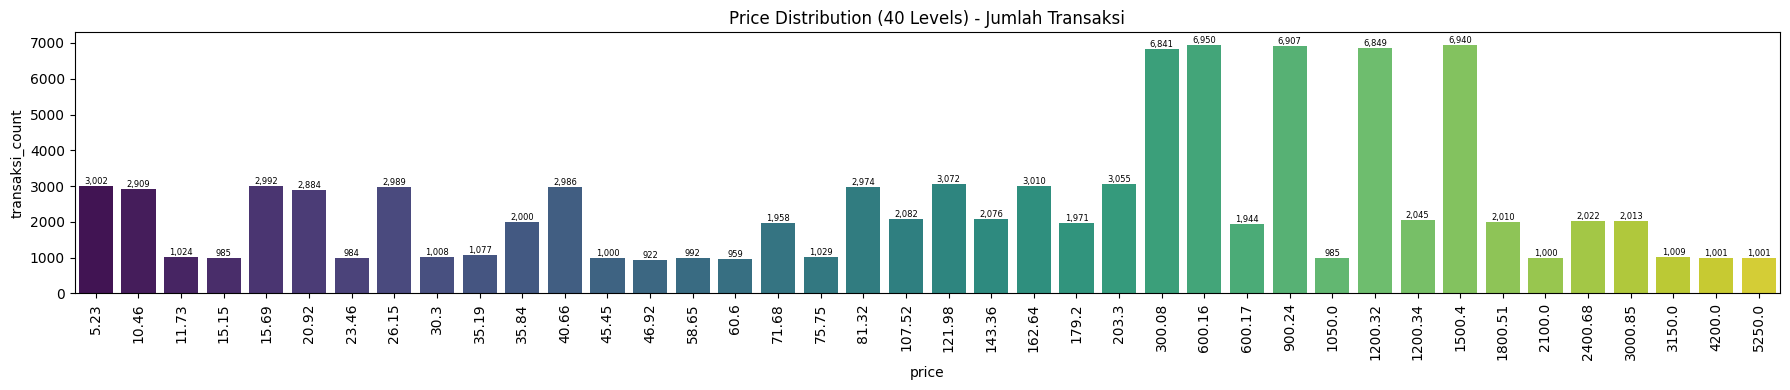

In [72]:
plot_two_bars(
    price_plot_df,
    x_col="price",
    title_prefix="Price Distribution (40 Levels)",
    palette="viridis",
    figsize=(18,4),
    order=price_plot_df["price"].tolist(),  # urut dari murah → mahal
    rotate_x=True,
    label_position="top",
    label_rotation=0,
    label_fontsize=6
)


In [81]:
price_target = 600.16

price_600_category = (
    df[df["price"] == price_target]
    .groupby("category")
    .size()
    .reset_index(name="jumlah_transaksi")
    .sort_values("jumlah_transaksi", ascending=False)
)

print(f"Variasi kategori untuk price = {price_target}")
price_600_category


Variasi kategori untuk price = 600.16


,category,jumlah_transaksi
0,Clothing,6950


In [82]:
# Filter kategori Clothing
df_clothing = df[df["category"] == "Clothing"]

# Ambil variasi price (unik & urut)
clothing_prices = sorted(df_clothing["price"].unique())

print("Kategori : Clothing")
print("Jumlah variasi price :", len(clothing_prices))
print("\nDaftar price (urut dari terendah ke tertinggi):\n")

for p in clothing_prices:
    print(p)


Kategori : Clothing
Jumlah variasi price : 5

Daftar price (urut dari terendah ke tertinggi):

300.08
600.16
900.24
1200.32
1500.4


JUMLAH TRANSAKI TERBANYAK KE 2, SELAIN PAKAIAN

In [92]:
price_target = 121.98

price_121_category = (
    df[df["price"] == price_target]
    .groupby("category")
    .size()
    .reset_index(name="jumlah_transaksi")
    .sort_values("jumlah_transaksi", ascending=False)
)

print(f"Variasi kategori untuk price = {price_target}")
price_121_category


Variasi kategori untuk price = 121.98


,category,jumlah_transaksi
0,Cosmetics,3072


In [93]:
# Filter kategori Cosmetics
df_cosmetics = df[df["category"] == "Cosmetics"]

# Ambil variasi price (unik & urut)
cosmetics_prices = sorted(df_cosmetics["price"].unique())

print("Kategori : Cosmetics")
print("Jumlah variasi price :", len(cosmetics_prices))
print("\nDaftar price (urut dari terendah ke tertinggi):\n")

for p in cosmetics_prices:
    print(p)


Kategori : Cosmetics
Jumlah variasi price : 5

Daftar price (urut dari terendah ke tertinggi):

40.66
81.32
121.98
162.64
203.3


coba bagian 2

INSIGHT UNTUK KATEGORI PRICE KELAS

In [63]:
price_class_summary = (
    df.groupby("price_class")
      .agg(
          transaksi_count=("price", "size"),
          price_min=("price", "min"),
          price_max=("price", "max"),
          price_mean=("price", "mean"),
          unique_price=("price", "nunique")
      )
      .reset_index()
)

price_class_summary


,price_class,transaksi_count,price_min,price_max,price_mean,unique_price
0,0,10912,5.23,15.69,10.997741,5
1,1,15850,20.92,46.92,32.291691,9
2,2,7912,58.65,81.32,72.856177,5
3,3,22107,107.52,300.08,199.614282,7
4,4,15801,600.16,900.24,731.333470,3
5,5,18829,1050.00,1800.51,1367.132513,5
6,6,8046,2100.00,5250.00,3185.767588,6


In [64]:
priceclass_insight = (
    df.groupby("price_class")
      .agg(
          transaksi_count=("price", "size"),
          total_spend_sum=("total_spend", "sum"),
          price_min=("price", "min"),
          price_max=("price", "max")
      )
      .reset_index()
      .sort_values("price_class")
)

priceclass_insight


,price_class,transaksi_count,total_spend_sum,price_min,price_max
0,0,10912,2.443245e+05,5.23,15.69
1,1,15850,1.355580e+06,20.92,46.92
2,2,7912,1.677490e+06,58.65,81.32
3,3,22107,1.186866e+07,107.52,300.08
4,4,15801,2.816283e+07,600.16,900.24
5,5,18829,1.017486e+08,1050.00,1800.51
6,6,8046,1.064484e+08,2100.00,5250.00


In [67]:
price_class_label = {
    0: "<= 20",
    1: "21 – 50",
    2: "51 – 100",
    3: "101 – 500",
    4: "501 – 1000",
    5: "1001 – 2000",
    6: "2001 – 6000",
}


priceclass_insight["price_class_label"] = priceclass_insight["price_class"].map(price_class_label)
priceclass_insight


,price_class,transaksi_count,total_spend_sum,price_min,price_max,price_class_label
0,0,10912,2.443245e+05,5.23,15.69,<= 20
1,1,15850,1.355580e+06,20.92,46.92,21 – 50
2,2,7912,1.677490e+06,58.65,81.32,51 – 100
3,3,22107,1.186866e+07,107.52,300.08,101 – 500
4,4,15801,2.816283e+07,600.16,900.24,501 – 1000
5,5,18829,1.017486e+08,1050.00,1800.51,1001 – 2000
6,6,8046,1.064484e+08,2100.00,5250.00,2001 – 6000


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_two_bars(
    insight_df,
    x_col,
    title_prefix="",
    palette="Set2",
    figsize=(10,4),
    order=None,
    rotate_x=False,
    label_position="center",
    label_rotation=0,
    label_fontsize=9
):

    def _plot_one(y_col, title):
        plt.figure(figsize=figsize)
        ax = sns.barplot(
            data=insight_df,
            x=x_col,
            y=y_col,
            palette=palette,
            order=order
        )

        # label bar
        for p in ax.patches:
            h = p.get_height()
            if h == 0:
                continue

            if label_position == "center":
                y = h / 2
                va = "center"
                color = "white"
            else:
                y = h
                va = "bottom"
                color = "black"

            ax.annotate(
                f"{h:,.0f}" if y_col != "transaksi_count" else f"{int(h):,}",
                (p.get_x() + p.get_width() / 2., y),
                ha="center",
                va=va,
                fontsize=label_fontsize,
                color=color,
                rotation=label_rotation
            )

        plt.title(title)
        if rotate_x:
            plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    #Total Spend
    _plot_one(
        "total_spend_sum",
        f"{title_prefix} - Total Spend"
    )

    #Jumlah Transaksi
    _plot_one(
        "transaksi_count",
        f"{title_prefix} - Jumlah Transaksi"
    )


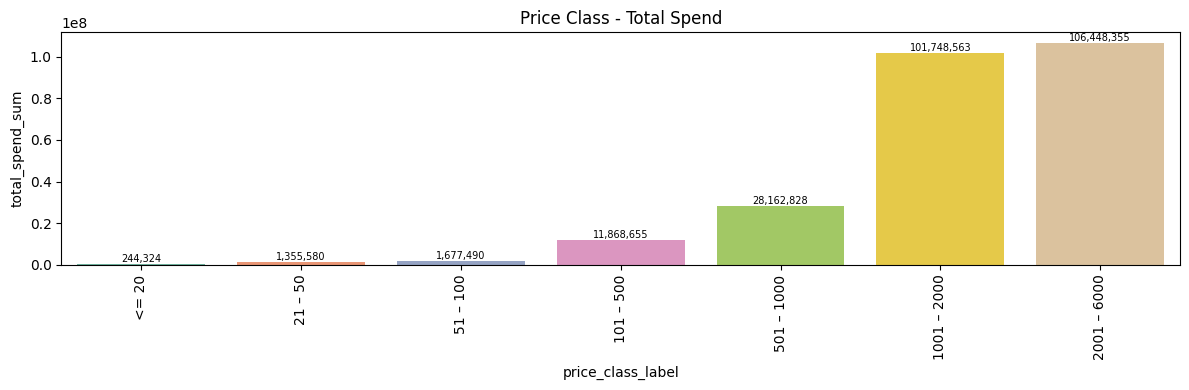

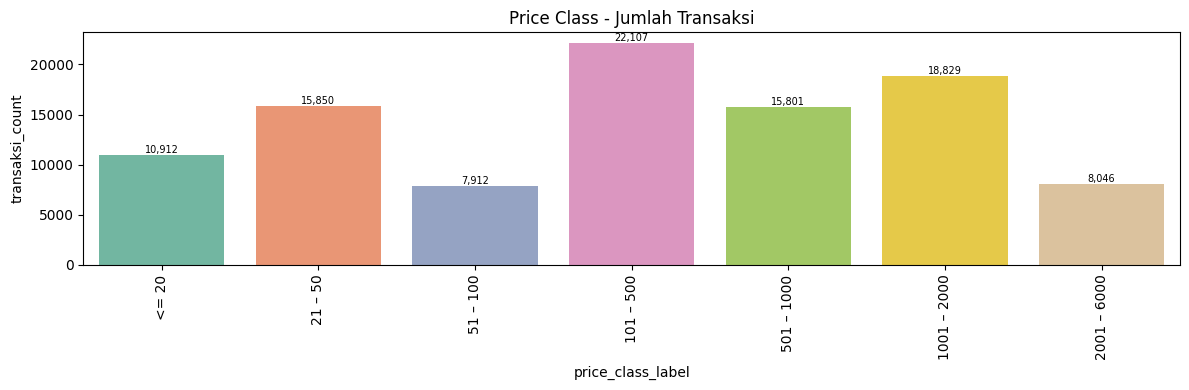

In [69]:
plot_two_bars(
    priceclass_insight,
    x_col="price_class_label",
    title_prefix="Price Class",
    palette="Set2",
    figsize=(12,4),
    order=list(price_class_label.values()),
    rotate_x=True,
    label_position="top",
    label_rotation=0,
    label_fontsize=7
)


FOKUS KATEGORI

In [95]:
high_prices = [
    1050.00, 1200.32, 1200.34, 1500.40, 1800.51,
    2100.00, 2400.68, 3000.85, 3150.00, 4200.00, 5250.00
]

df_high_price = df[df["price"].isin(high_prices)]

print("Jumlah transaksi HIGH PRICE:", len(df_high_price))
df_high_price[["category", "price"]].tail()


Jumlah transaksi HIGH PRICE: 26875


,category,price
99430,Clothing,1500.40
99436,Clothing,1500.40
99442,Clothing,1200.32
99448,Shoes,2400.68
99455,Technology,4200.00


In [96]:
high_price_category_count = (
    df_high_price
    .groupby("category")
    .size()
    .reset_index(name="transaksi_count")
    .sort_values("transaksi_count", ascending=False)
)

print("Variasi kategori pada HIGH PRICE (berdasarkan transaksi):")
high_price_category_count


Variasi kategori pada HIGH PRICE (berdasarkan transaksi):


,category,transaksi_count
0,Clothing,13789
1,Shoes,8090
2,Technology,4996


In [97]:
high_price_matrix = (
    df_high_price
    .groupby(["price", "category"])
    .size()
    .reset_index(name="transaksi_count")
    .sort_values(["price", "transaksi_count"], ascending=[True, False])
)

high_price_matrix


,price,category,transaksi_count
0,1050.00,Technology,985
1,1200.32,Clothing,6849
2,1200.34,Shoes,2045
3,1500.40,Clothing,6940
4,1800.51,Shoes,2010
5,2100.00,Technology,1000
6,2400.68,Shoes,2022
7,3000.85,Shoes,2013
8,3150.00,Technology,1009
9,4200.00,Technology,1001


In [98]:
high_price_insight = (
    df_high_price
    .groupby("category")
    .agg(
        transaksi_count=("price", "size"),
        total_spend_sum=("total_spend", "sum")
    )
    .reset_index()
    .sort_values("transaksi_count", ascending=False)
)

high_price_insight


,category,transaksi_count,total_spend_sum
0,Clothing,13789,84947846.72
1,Shoes,8090,65386720.99
2,Technology,4996,57862350.00


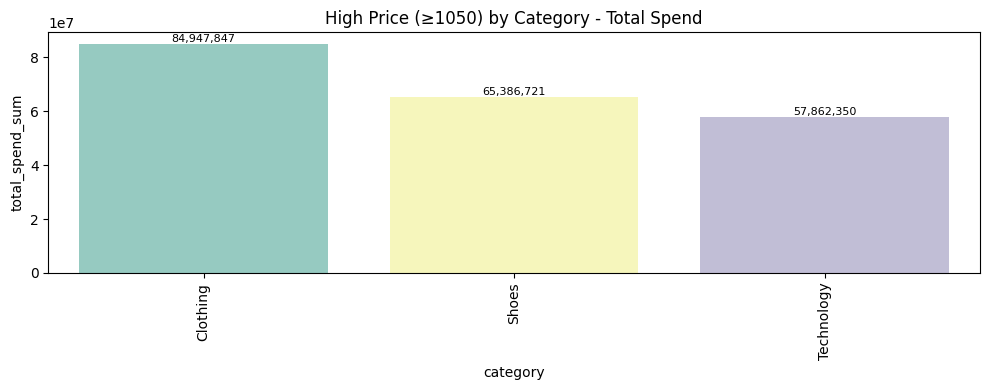

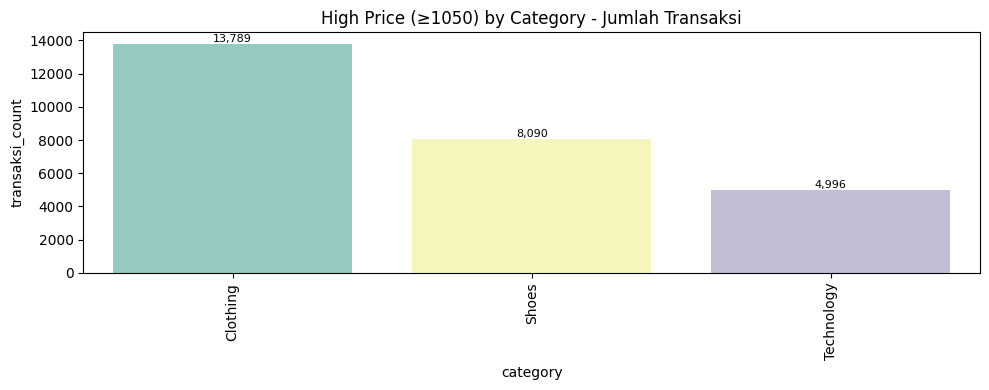

In [99]:
plot_two_bars(
    high_price_insight,
    x_col="category",
    title_prefix="High Price (≥1050) by Category",
    palette="Set3",
    figsize=(10,4),
    rotate_x=True,
    label_position="top",
    label_rotation=0,
    label_fontsize=8
)


SAVE DATA INSIGHT KE 2

In [100]:
# Path folder tujuan
save_path = "/content/drive/MyDrive/MATKUL_ELEKTRONIK/customer_shopping_data_final_insight.csv"

# Simpan dataframe
df.to_csv(save_path, index=False)

print("Data insight berhasil disimpan!")
print("Lokasi:", save_path)


Data insight berhasil disimpan!
Lokasi: /content/drive/MyDrive/MATKUL_ELEKTRONIK/customer_shopping_data_final_insight.csv


In [101]:
import os
os.path.exists(save_path)


True

HEATMAP

In [102]:
path = "/content/drive/MyDrive/MATKUL_ELEKTRONIK/customer_shopping_data_final_insight.csv"
df = pd.read_csv(path)

print("Shape:", df.shape)
df.head()


Shape: (99457, 14)


,gender,age,category,quantity,price,payment_method,shopping_mall,invoice_date_time,invoice_date_day,invoice_date_month,invoice_date_year,total_spend,age_class,price_class
0,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,2022-08-05,5,8,2022,7502.00,2,5
1,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,2021-12-12,12,12,2021,5401.53,2,5
2,Male,20,Clothing,1,300.08,Cash,Metrocity,2021-11-09,9,11,2021,300.08,1,3
3,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,2021-05-16,16,5,2021,15004.25,6,6
4,Female,53,Books,4,60.60,Cash,Kanyon,2021-10-24,24,10,2021,242.40,5,2


In [103]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              99457 non-null  object 
 1   age                 99457 non-null  int64  
 2   category            99457 non-null  object 
 3   quantity            99457 non-null  int64  
 4   price               99457 non-null  float64
 5   payment_method      99457 non-null  object 
 6   shopping_mall       99457 non-null  object 
 7   invoice_date_time   99457 non-null  object 
 8   invoice_date_day    99457 non-null  int64  
 9   invoice_date_month  99457 non-null  int64  
 10  invoice_date_year   99457 non-null  int64  
 11  total_spend         99457 non-null  float64
 12  age_class           99457 non-null  int64  
 13  price_class         99457 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 10.6+ MB


In [104]:
numeric_cols = [
    "age",
    "age_class",
    "quantity",
    "price",
    "price_class",
    "total_spend",
    "invoice_date_day",
    "invoice_date_month",
    "invoice_date_year"
]

df_corr = df[numeric_cols]
df_corr.head()


,age,age_class,quantity,price,price_class,total_spend,invoice_date_day,invoice_date_month,invoice_date_year
0,28,2,5,1500.40,5,7502.00,5,8,2022
1,21,2,3,1800.51,5,5401.53,12,12,2021
2,20,1,1,300.08,3,300.08,9,11,2021
3,66,6,5,3000.85,6,15004.25,16,5,2021
4,53,5,4,60.60,2,242.40,24,10,2021


In [105]:
corr_matrix = df_corr.corr(method="pearson")
corr_matrix


,age,age_class,quantity,price,price_class,total_spend,invoice_date_day,invoice_date_month,invoice_date_year
age,1.000000,0.981922,0.000667,0.001694,0.000493,0.002731,0.008174,0.006048,-0.002390
age_class,0.981922,1.000000,0.000721,0.001428,-0.000027,0.002343,0.007241,0.004975,-0.002742
quantity,0.000667,0.000721,1.000000,0.344880,0.349365,0.461173,0.000491,0.002731,0.000821
price,0.001694,0.001428,0.344880,1.000000,0.784699,0.962372,-0.000336,0.001055,-0.000831
price_class,0.000493,-0.000027,0.349365,0.784699,1.000000,0.693349,0.004388,0.001103,-0.004880
total_spend,0.002731,0.002343,0.461173,0.962372,0.693349,1.000000,-0.001080,0.001771,0.000576
invoice_date_day,0.008174,0.007241,0.000491,-0.000336,0.004388,-0.001080,1.000000,0.019972,-0.036800
invoice_date_month,0.006048,0.004975,0.002731,0.001055,0.001103,0.001771,0.019972,1.000000,-0.255479
invoice_date_year,-0.002390,-0.002742,0.000821,-0.000831,-0.004880,0.000576,-0.036800,-0.255479,1.000000


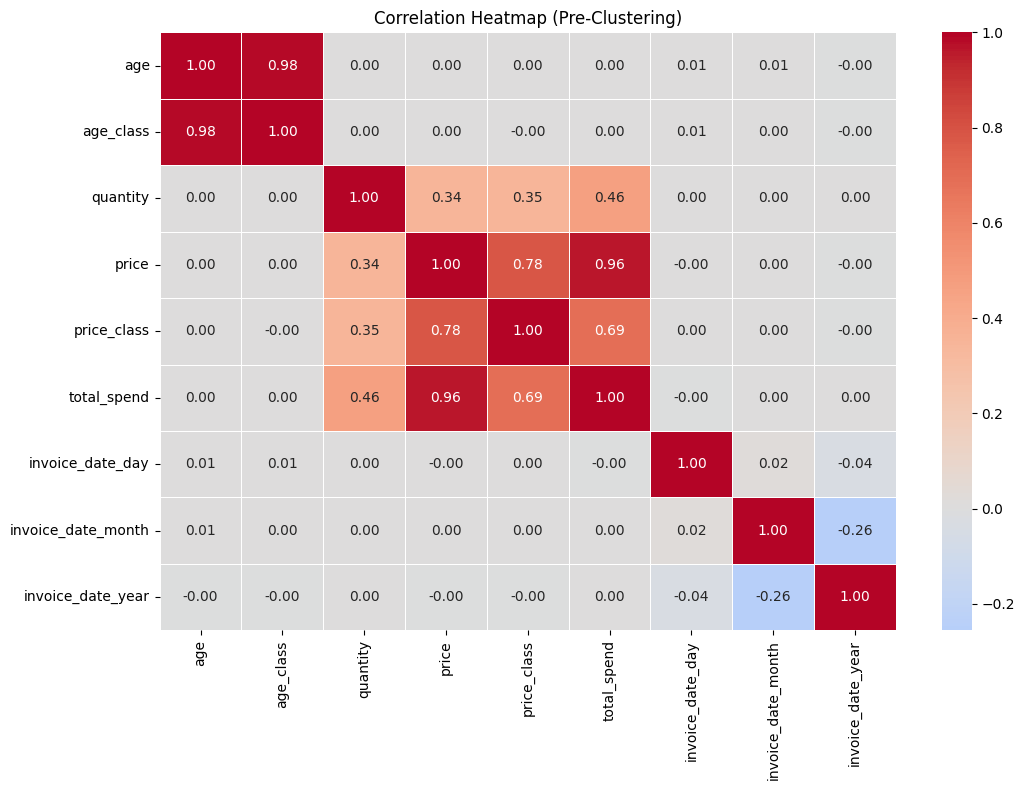

In [106]:
plt.figure(figsize=(11,8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Correlation Heatmap (Pre-Clustering)")
plt.tight_layout()
plt.show()


Total pengeluaran pelanggan terutama dipengaruhi oleh harga dan jumlah barang yang dibeli, sementara faktor demografis seperti usia serta faktor waktu transaksi menunjukkan hubungan yang sangat lemah. Hal ini mengindikasikan bahwa pola belanja tidak dapat dijelaskan hanya melalui korelasi linear, sehingga diperlukan pendekatan lanjutan seperti clustering untuk menemukan segmentasi pelanggan yang lebih mendalam.